In [67]:
import numpy as np
import pandas as pd

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = [15, 15]  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

In [68]:
df_boolean = pd.read_csv("../dfs/2024-06-17_08-57-05.csv")
df_arith = pd.read_csv("../dfs/2024-06-17_18-47-37.csv")

# make df_boolean the same size as df_arith
df_boolean = df_boolean[:len(df_arith)]

df_boolean.head()

,Unnamed: 0,ref_img,other_img,result,expected_result,cos_dist_np,cos_dist_sfe,total_time,sfe_time,extraction_time,...,client.communication.setup.sent,client.communication.setup.received,client.communication.otextension.sent,client.communication.otextension.received,client.communication.garbling.sent,client.communication.garbling.received,client.communication.online.sent,client.communication.online.received,client.cos_dist_ver,client.cos_dist_sfe
0,0,lfw/Adrian_McPherson/Adrian_McPherson_0001.jpg,lfw/Adrian_McPherson/Adrian_McPherson_0002.jpg,False,True,0.793648,0.793648,127.755041,111.892479,15.862561,...,9551537,9551528,9551519,9551528,0,0,229680,229680,0.793648,0.793648
1,0,lfw/Adrian_McPherson/Adrian_McPherson_0001.jpg,lfw/Carla_Gay_Balingit/Carla_Gay_Balingit_0001...,False,False,1.095953,1.095953,128.093444,111.316047,16.777397,...,9551537,9551528,9551519,9551528,0,0,229671,229680,1.095953,1.095953
2,0,lfw/Adrian_Nastase/Adrian_Nastase_0001.jpg,lfw/Adrian_Nastase/Adrian_Nastase_0002.jpg,True,True,0.512203,0.512203,130.529793,114.600467,15.929326,...,9551537,9551528,9551528,9551528,0,0,229680,229680,0.512203,0.512203
3,0,lfw/Adrian_Nastase/Adrian_Nastase_0001.jpg,lfw/Pedro_Duque/Pedro_Duque_0001.jpg,False,False,1.139193,1.139193,128.002896,112.067362,15.935535,...,9551537,9551528,9551520,9551528,0,0,229680,229680,1.139193,1.139193
4,0,lfw/Adrien_Brody/Adrien_Brody_0001.jpg,lfw/Adrien_Brody/Adrien_Brody_0002.jpg,False,True,0.919986,0.919986,128.765164,112.692727,16.072437,...,9551537,9551528,9551528,9551528,0,0,229671,229680,0.919986,0.919986


In [69]:
df_arith.head()

,Unnamed: 0,ref_img,other_img,result,expected_result,cos_dist_np,cos_dist_sfe,total_time,sfe_time,extraction_time,...,client.communication.setup.sent,client.communication.setup.received,client.communication.otextension.sent,client.communication.otextension.received,client.communication.garbling.sent,client.communication.garbling.received,client.communication.online.sent,client.communication.online.received,client.cos_dist_ver,client.cos_dist_sfe
0,0,lfw/Adrian_McPherson/Adrian_McPherson_0001.jpg,lfw/Adrian_McPherson/Adrian_McPherson_0002.jpg,False,True,0.806733,0.806733,89.361561,75.052649,14.308913,...,122232,122223,122232,122223,0,0,2265,2265,0.806733,0.806733
1,0,lfw/Adrian_McPherson/Adrian_McPherson_0001.jpg,lfw/Teri_ORourke/Teri_ORourke_0001.jpg,True,False,0.994159,-13264.506836,89.387192,74.414997,14.972195,...,122232,122224,122231,122224,0,0,2265,2264,0.994159,-13264.506836
2,0,lfw/Adrian_Nastase/Adrian_Nastase_0001.jpg,lfw/Adrian_Nastase/Adrian_Nastase_0002.jpg,True,True,0.519163,0.519163,92.188766,76.559905,15.628861,...,122232,122223,122232,122223,0,0,2265,2265,0.519163,0.519163
3,0,lfw/Adrian_Nastase/Adrian_Nastase_0001.jpg,lfw/Alejandro_Lerner/Alejandro_Lerner_0001.jpg,False,False,0.926165,0.926165,93.852140,77.984984,15.867156,...,122232,122223,122223,122223,0,0,2265,2265,0.926165,0.926165
4,0,lfw/Adrien_Brody/Adrien_Brody_0001.jpg,lfw/Adrien_Brody/Adrien_Brody_0002.jpg,False,True,0.939456,0.939456,91.308940,75.245588,16.063352,...,122232,122223,122231,122223,0,0,2265,2265,0.939456,0.939456


In [70]:
# for i in range(len(df_boolean["cos_dist_np"])):
#     print(df_boolean["cos_dist_np"][i])
#     print(df_boolean["cos_dist_sfe"][i])
#     print()

# remove any value in df_boolean["cos_dist_sfe"][i] that is larger than 2 or smaller than -2
# for i in range(len(df_boolean["cos_dist_sfe"])):
#     if df_boolean["cos_dist_sfe"][i] > 2 or df_boolean["cos_dist_sfe"][i] < -2:
#         df_boolean["cos_dist_sfe"][i] = df_boolean["cos_dist_np"][i]



# # devide all values from df_arith["cos_dist_sfe"][i] by 10000000
# for i in range(len(df_arith["cos_dist_sfe"])):
#     df_arith["cos_dist_np"][i] = 1 - (df_arith["cos_dist_np"][i] / 10000000)
#     df_arith["cos_dist_sfe"][i] = 1 - (df_arith["cos_dist_sfe"][i] / 10000000)

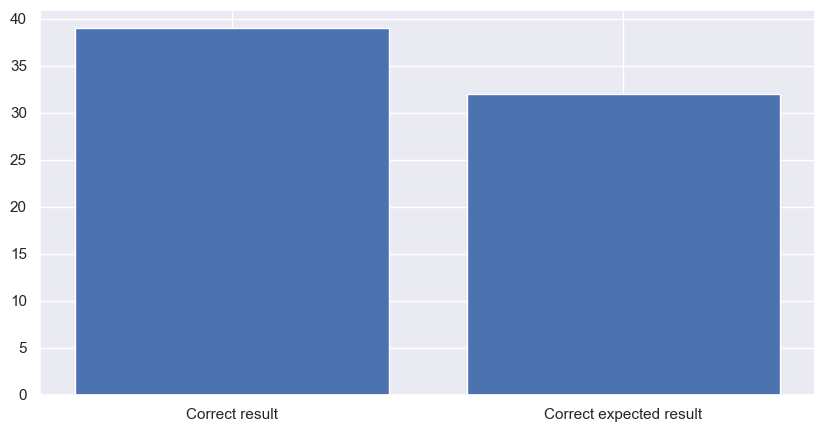

In [71]:
# To plot result vs expected result we need to know how many times the result is correct
# and how many times the expected result is correct
correct_result_boolean = 0
correct_expected_result_boolean = 0
for i in range(len(df_boolean["result"])):
    correct_result_boolean += 1
    if df_boolean["result"][i] == df_boolean["expected_result"][i]:
        correct_expected_result_boolean += 1

# plot correct result vs correct expected result in bar chart
plt.figure(figsize=(10, 5))
plt.bar(["Correct result", "Correct expected result"], [correct_result_boolean, correct_expected_result_boolean])
plt.show()

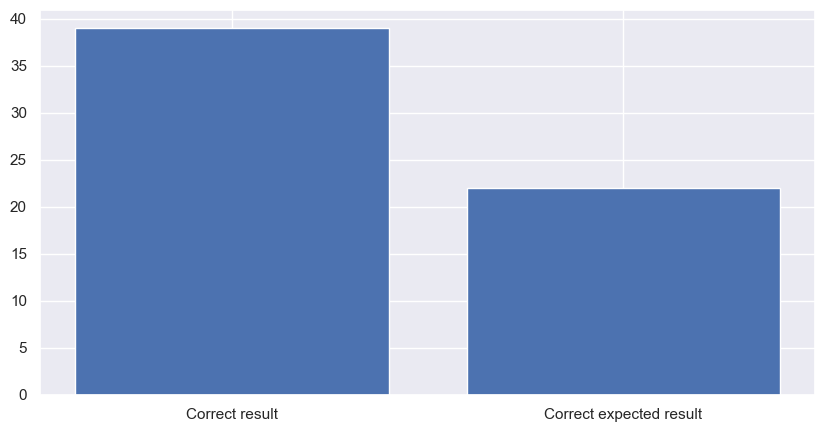

In [72]:
# do the same for arithmetic
correct_result = 0
correct_expected_result = 0
for i in range(len(df_arith["result"])):
    correct_result += 1
    if df_arith["result"][i] == df_arith["expected_result"][i]:
        correct_expected_result += 1

# plot correct result vs correct expected result in bar chart
plt.figure(figsize=(10, 5))
plt.bar(["Correct result", "Correct expected result"], [correct_result, correct_expected_result])
plt.show()

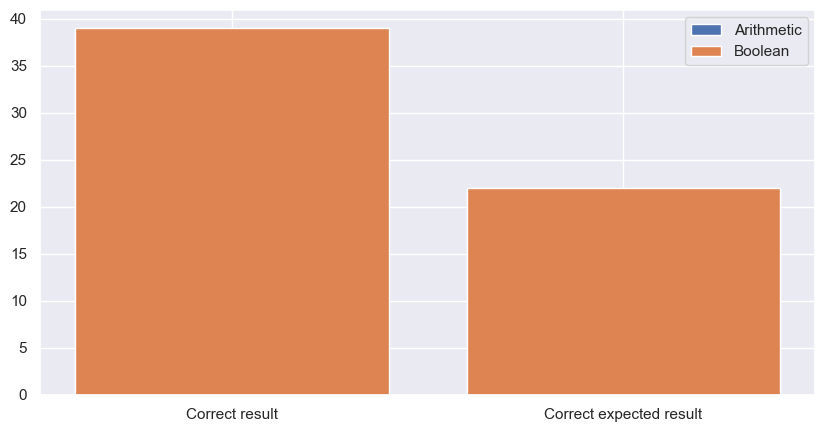

In [73]:
# merge the above two plots
plt.figure(figsize=(10, 5))
plt.bar(["Correct result", "Correct expected result"], [correct_result, correct_expected_result], label="Arithmetic")
plt.bar(["Correct result", "Correct expected result"], [correct_result, correct_expected_result], label="Boolean")
plt.legend()
plt.show()

In [74]:
l = [df_boolean['sfe_time'], df_arith['sfe_time']]

Text(0.5, 0, 'Configuration')

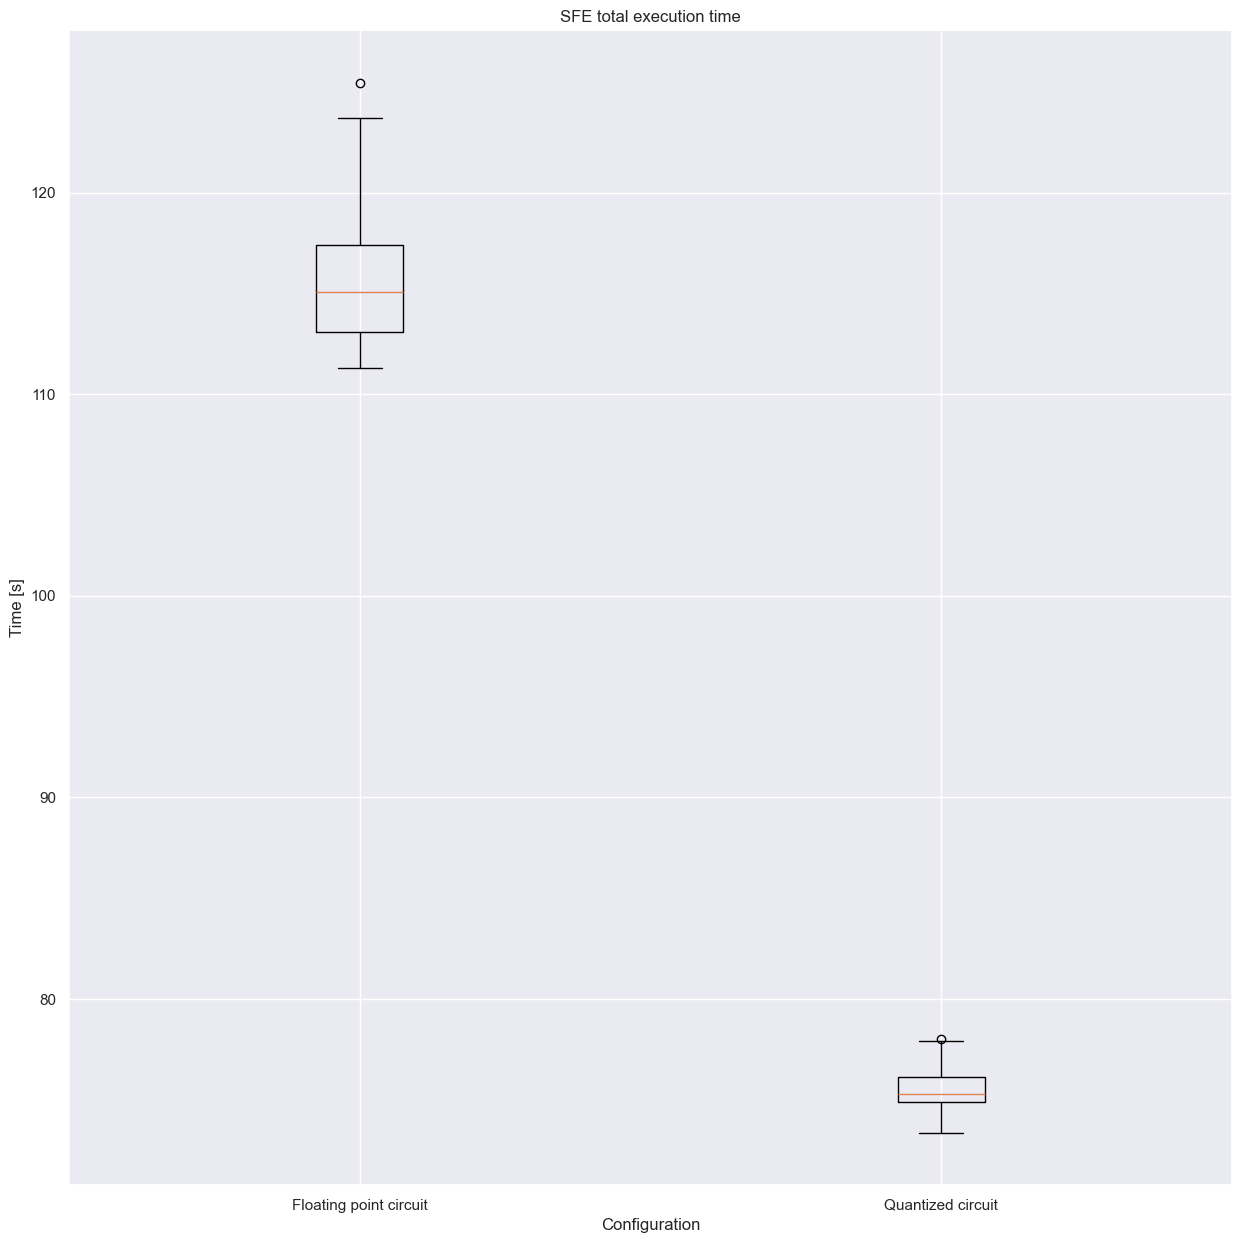

In [75]:
# plt.xticks(rotation=0)
labels = ["Floating point circuit", "Quantized circuit"]
ax = plt.boxplot(l, labels=labels)
plt.title("SFE total execution time")
plt.ylabel("Time [s]")
plt.xlabel("Configuration")

df_arith_timing = df_arith['sfe_'] / 1000
df_arith_timing.plot()
plt.title("SFE total time: 32-bit")
plt.ylabel("Time [s]")
plt.xlabel("Iteration #")

<Axes: >

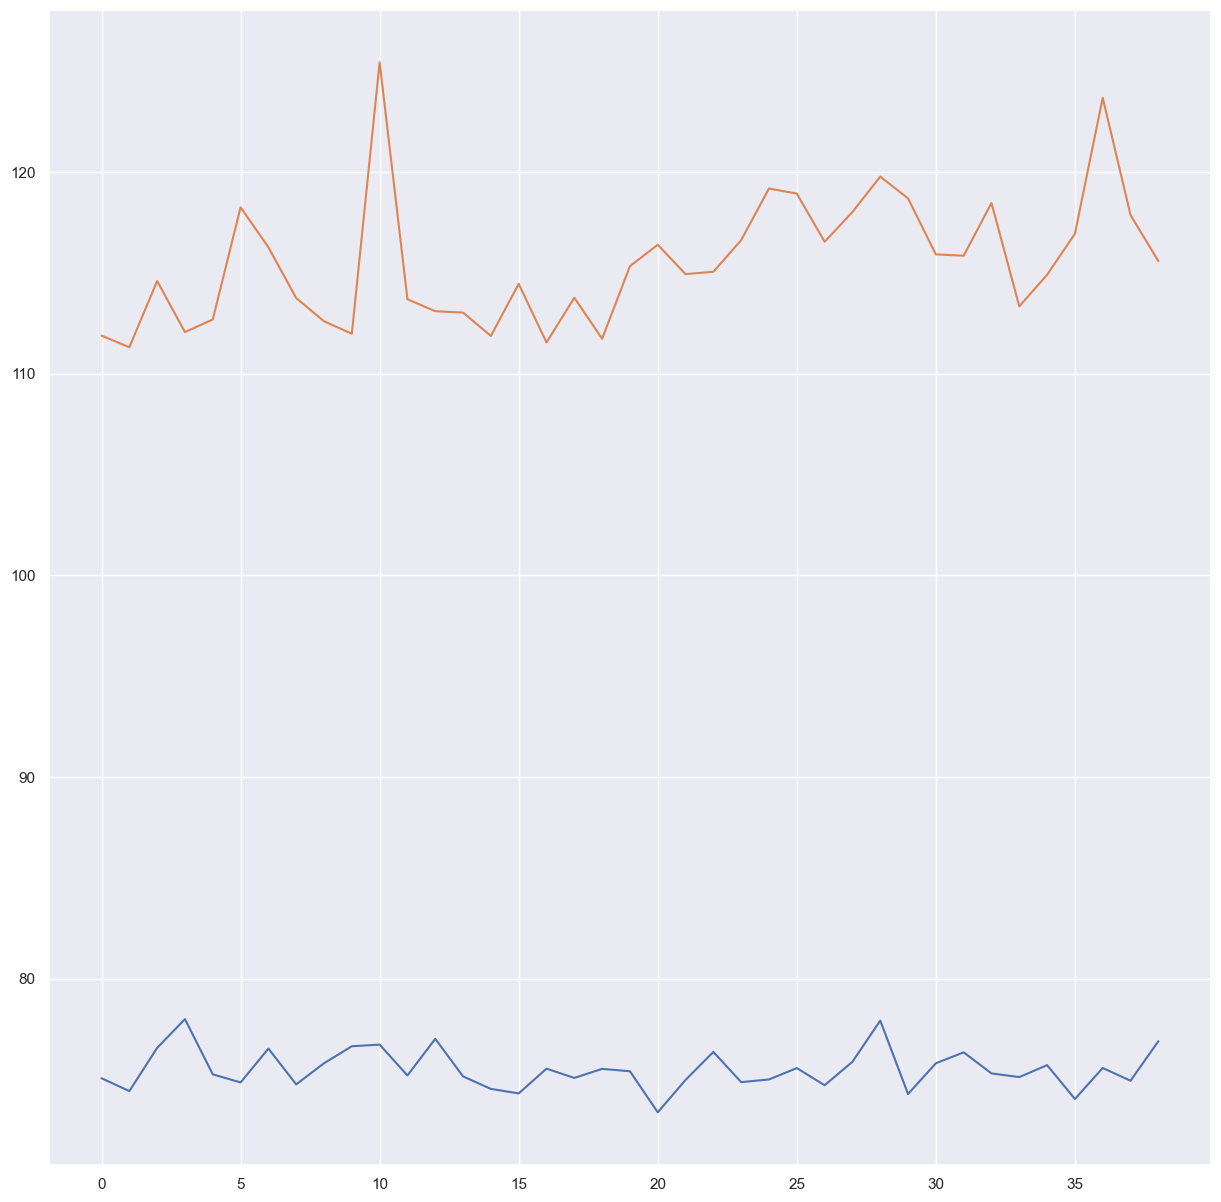

In [76]:
df_arith_timings_1st = df_arith['sfe_time']
df_arith_timings_1st.plot()
# also get df_boolean sfe time and plot that line on the same graph
df_boolean_timings_1st = df_boolean['sfe_time']
df_boolean_timings_1st.plot()

In [77]:
# print mean of sfe time for both configurations
print("Mean sfe time for floating point circuit: ", df_boolean['sfe_time'].mean())
print("Mean sfe time for quantized circuit: ", df_arith['sfe_time'].mean())

Mean sfe time for floating point circuit:  115.54550736378401
Mean sfe time for quantized circuit:  75.50512707539094
